# Chapter 4 Problems 

> of "<ins>Modern Compressible Flow With Historical Perspective</ins>", Third Edition, John D. Anderson Jr

In [1]:
import pygasflow
from pygasflow.solvers import *
from pygasflow.shockwave import PressureDeflectionLocus
from pygasflow.interactive import PressureDeflectionDiagram
import pint
import numpy as np

ureg = pint.UnitRegistry()
# use "~P" to format units with unicode
ureg.formatter.default_format = "~"
# let pygasflow knows which UnitRegistry to use
pygasflow.defaults.pint_ureg = ureg
# dictionary results offers improved code readability
pygasflow.defaults.solver_to_dict = True

# shorcuts for conveniance
kg = ureg.kg
K = ureg.K
degR = ureg.degR
degC = ureg.degC
J = ureg.J
m = ureg.m
atm = ureg.atm
Pa = ureg.pascal
sec = ureg.s
deg = ureg.deg
ft = ureg.feet
lb = ureg.lb
lbf = ureg.lbf
Q_ = ureg.Quantity

gamma = 1.4
R = 287.05 * J / (kg * K)

## P 4.1

In [2]:
beta = 35
p1 = 2000 * lbf / ft**2
T1 = Q_(520, degR)
V1 = 3355 * ft / sec

In [3]:
a1 = np.sqrt(gamma * R * T1).to("feet / sec")
a1

<Quantity(1117.87502, 'foot / second')>

In [4]:
M1 = V1 / a1
M1

<Quantity(3.00122997, 'dimensionless')>

In [5]:
res = oblique_shockwave_solver("mu", M1, "beta", beta, gamma=gamma)
res.show()

key     quantity     
---------------------
mu      Mu                3.00122997
mnu     Mnu               1.72143479
md      Md                2.12235516
mnd     Mnd               0.63509251
beta    beta [deg]       35.00000000
theta   theta [deg]      17.58806818
pr      pd/pu             3.29056069
dr      rhod/rhou         2.23273544
tr      Td/Tu             1.47377993
tpr     p0d/p0u           0.84675091


In [6]:
M2 = res["md"]
T2 = res["tr"] * T1
p2 = res["pr"] * p1
a2 = np.sqrt(gamma * R * T2).to("feet / sec")
V2 = M2 * a2
print("M2 =", M2)
print("T2 =", T2)
print("p2 =", p2)
print("V2 =", V2)

M2 = 2.122355155390347
T2 = 766.3655650131336 °R
p2 = 6581.121386426136 lbf / ft ** 2
V2 = 2880.2330533718173 ft / s


## P 4.2

In [7]:
M1 = 2
theta = 10

In [8]:
res = shockwave_solver("mu", M1, "theta", theta, gamma=gamma)
res.show()

key     quantity     
---------------------
mu      Mu                2.00000000
mnu     Mnu               1.26713804
md      Md                1.64052223
mnd     Mnd               0.80319064
beta    beta             39.31393184
theta   theta            10.00000000
pr      pd/pu             1.70657860
dr      rhod/rhou         1.45842561
tr      Td/Tu             1.17015128
tpr     p0d/p0u           0.98464402


In [9]:
P02_P01 = res["tpr"]
P02_P01

np.float64(0.9846440225034325)

## P 4.3

In [10]:
M1 = 3
p1 = 1 * atm

In [11]:
from pygasflow.shockwave import detachment_point_oblique_shock
beta, theta_max = detachment_point_oblique_shock(M1, gamma)
theta_max

np.float64(34.0734397756058)

In [12]:
beta

np.float64(65.2408429247936)

In [13]:
res = shockwave_solver("mu", M1, "beta", beta, gamma=gamma)
res.show()

key     quantity     
---------------------
mu      Mu                3.00000000
mnu     Mnu               2.72422875
md      Md                0.95404661
mnd     Mnd               0.49375756
beta    beta             65.24084292
theta   theta            34.07343978
pr      pd/pu             8.49165936
dr      rhod/rhou         3.58481764
tr      Td/Tu             2.36878419
tpr     p0d/p0u           0.41510057


In [14]:
p2_p1 = res["pr"]
p2 = p2_p1 * p1
p2

<Quantity(8.49165936, 'standard_atmosphere')>

## P 4.4

In [15]:
M1 = 3.5
p1 = 1 * atm
p2 = 5.48 * atm

In [16]:
res_normal = normal_shockwave_solver("pressure", p2 / p1, gamma=gamma)
res_normal.show()

key     quantity     
---------------------
mu      Mu                2.20000000
md      Md                0.54705582
pr      pd/pu             5.48000000
dr      rhod/rhou         2.95121951
tr      Td/Tu             1.85685950
tpr     p0d/p0u           0.62813631


In [17]:
Mn1 = res_normal["mu"]
Mn1

np.float64(2.2)

In [18]:
res = shockwave_solver("mu", M1, "mnu", Mn1, gamma=gamma)
res.show()

key     quantity     
---------------------
mu      Mu                3.50000000
mnu     Mnu               2.20000000
md      Md                2.07120229
mnd     Mnd               0.54705582
beta    beta             38.94480359
theta   theta            23.62985080
pr      pd/pu             5.48000000
dr      rhod/rhou         2.95121951
tr      Td/Tu             1.85685950
tpr     p0d/p0u           0.62813631


In [19]:
beta = res["beta"]
beta

np.float64(38.94480359409562)

In [20]:
theta = res["theta"]
theta

np.float64(23.62985080421891)

## P 4.5

In [21]:
M1 = 3
theta = 20
p1 = 2116 * lbf / ft**2
T1 = Q_(519, degR)

In [22]:
res = shockwave_solver("mu", M1, "theta", theta, gamma=gamma)
res.show()

key     quantity     
---------------------
mu      Mu                3.00000000
mnu     Mnu               1.83721625
md      Md                1.99413167
mnd     Mnd               0.60839147
beta    beta             37.76363415
theta   theta            20.00000000
pr      pd/pu             3.77125746
dr      rhod/rhou         2.41806593
tr      Td/Tu             1.55961730
tpr     p0d/p0u           0.79601825


In [23]:
p2 = res["pr"] * p1
T2 = res["tr"] * T1
beta = res["beta"]
M2 = res["md"]

In [24]:
beta

np.float64(37.76363414837576)

In [25]:
T2

<Quantity(809.44138, 'degree_Rankine')>

In [26]:
p2

<Quantity(7979.98079, 'force_pound / foot ** 2')>

In [27]:
M2

np.float64(1.9941316655645605)

## P 4.6

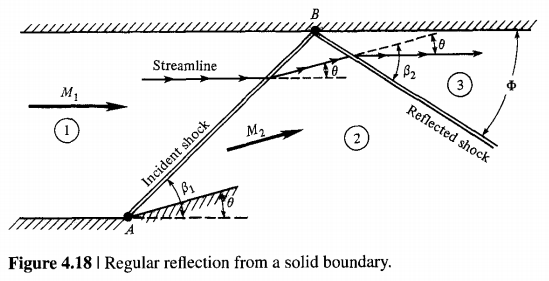

Figure 4.18 of "Modern Compressible Flow with Historical Perspective", Third Edition, John D. Anderson.

In [28]:
M1 = 3.6
theta1 = 20

In [29]:
l1 = PressureDeflectionLocus(M=M1, gamma=gamma, label="1")
shock1 = l1.shockwave_at_theta(theta1)
shock1.show()

key     quantity     
---------------------
mu      Mu                3.60000000
mnu     Mnu               2.01882925
md      Md                2.35520083
mnd     Mnd               0.57416754
beta    beta             34.11016555
theta   theta            20.00000000
pr      pd/pu             4.58828345
tr      rhod/rhou         1.70285858
dr      Td/Tu             2.69445948
tpr     p0d/p0u           0.71207412


In [30]:
l2 = l1.new_locus_from_shockwave(theta1, label="2")
theta3 = 0
shock2 = l2.shockwave_at_theta(theta3)
shock2.show()

key     quantity     
---------------------
mu      Mu                2.35520083
mnu     Mnu               1.66692918
md      Md                1.53331885
mnd     Mnd               0.64930284
beta    beta             45.05337524
theta   theta           -20.00000000
pr      pd/pu            14.10940762
tr      rhod/rhou         2.44318284
dr      Td/Tu             5.77501095
tpr     p0d/p0u           0.61896044


In [31]:
beta2 = shock2["beta"]
theta2 = shock2["theta"]
p3_p1 = shock2["pr"]
phi = beta2 - theta1
print("Angle of the reflected shock relative to the straight wall:")
print("\tphi =", phi)

Angle of the reflected shock relative to the straight wall:
	phi = 25.053375237345655


In [32]:
# initialize the diagram
d = PressureDeflectionDiagram()
d.add_locus(l1)
d.add_locus(l2)
# add a path highlighting the flow direction
l, arrows = d.add_path((l1, theta1), (l2, theta3))
d.add_state(theta3, p3_p1, "3")
# further customize the diagram
d.move_legend_outside()
d.y_range = (0, 16)
d.x_range = (-40, 40)
d.show_figure()

## P 4.7

In [33]:
beta = 30
M1 = 2.8
p1 = 1 * atm
T1 = 300 * K

Consider again Figure 4.18 shown in **P 4.6**:

In [34]:
from pygasflow.shockwave import theta_from_mach_beta
theta1 = theta_from_mach_beta(M1, beta, gamma)
theta1

np.float64(11.134851130136617)

In [35]:
l1 = PressureDeflectionLocus(M=M1, gamma=gamma, label="1")
shock1 = l1.shockwave_at_theta(theta1)
shock1.show()

key     quantity     
---------------------
mu      Mu                2.80000000
mnu     Mnu               1.40000000
md      Md                2.28770013
mnd     Mnd               0.73970927
beta    beta             30.00000000
theta   theta            11.13485113
pr      pd/pu             2.12000000
tr      rhod/rhou         1.25469388
dr      Td/Tu             1.68965517
tpr     p0d/p0u           0.95819441


In [36]:
l2 = l1.new_locus_from_shockwave(theta1, label="2")
theta3 = 0
shock2 = l2.shockwave_at_theta(theta3)
shock2.show()

key     quantity     
---------------------
mu      Mu                2.28770013
mnu     Mnu               1.33287598
md      Md                1.85622676
mnd     Mnd               0.76978466
beta    beta             35.63552836
theta   theta           -11.13485113
pr      pd/pu             4.04068774
tr      rhod/rhou         1.52032227
dr      Td/Tu             2.65778369
tpr     p0d/p0u           0.93256796


In [37]:
# Flow quantities in region 3
res = l2.flow_quantities_after_shockwave(0, p1, T1)
res.show()

key     quantity     
---------------------
M       M                 1.85622676
T       T [K]           456.09668068
p       p [atm]           4.04068774
rho     rho                      nan
T0      T0 [K]          770.40000000
p0      p0 [atm]         25.30830492
rho0    rho0                     nan


## P 4.8

In [38]:
M1 = 4
p1 = 1 * atm

In [39]:
res_ise = isentropic_solver("m", M1)
res_ise.show()

key     quantity            
----------------------------
m       M                        4.00000000
pr      P / P0                   0.00658609
dr      rho / rho0               0.02766157
tr      T / T0                   0.23809524
prs     P / P*                   0.01246700
drs     rho / rho*               0.04363449
trs     T / T*                   0.28571429
urs     U / U*                   2.13808994
ars     A / A*                  10.71875000
ma      Mach Angle              14.47751219
pm      Prandtl-Meyer           65.78481980


In [40]:
P01 = (1 / res_ise["pr"]) * p1
P01

<Quantity(151.835218, 'standard_atmosphere')>

### (a)

In [41]:
shock = normal_shockwave_solver("mu", M1)
shock.show()

key     quantity     
---------------------
mu      Mu                4.00000000
md      Md                0.43495884
pr      pd/pu            18.50000000
dr      rhod/rhou         4.57142857
tr      Td/Tu             4.04687500
tpr     p0d/p0u           0.13875622


In [42]:
M2 = shock["md"]
M2

np.float64(0.43495883620084)

In [43]:
P02 = shock["tpr"] * P01
P02

<Quantity(21.068081, 'standard_atmosphere')>

### (b)

In [44]:
beta = 40

In [45]:
shock1 = oblique_shockwave_solver("mu", M1, "beta", beta)
shock1.show()

key     quantity     
---------------------
mu      Mu                4.00000000
mnu     Mnu               2.57115044
md      Md                2.12299743
mnd     Mnd               0.50640589
beta    beta             40.00000000
theta   theta            26.20000079
pr      pd/pu             7.54595034
dr      rhod/rhou         3.41620196
tr      Td/Tu             2.20887127
tpr     p0d/p0u           0.47110479


In [46]:
shock2 = normal_shockwave_solver("mu", shock1["md"])
shock2.show()

key     quantity     
---------------------
mu      Mu                2.12299743
md      Md                0.55785338
pr      pd/pu             5.09163778
dr      rhod/rhou         2.84446962
tr      Td/Tu             1.79001307
tpr     p0d/p0u           0.66353036


In [47]:
M3 = shock2["md"]
M3

np.float64(0.5578533802322064)

In [48]:
P03 = shock1["tpr"] * shock2["tpr"] * P01
P03

<Quantity(47.4625246, 'standard_atmosphere')>

## P 4.9

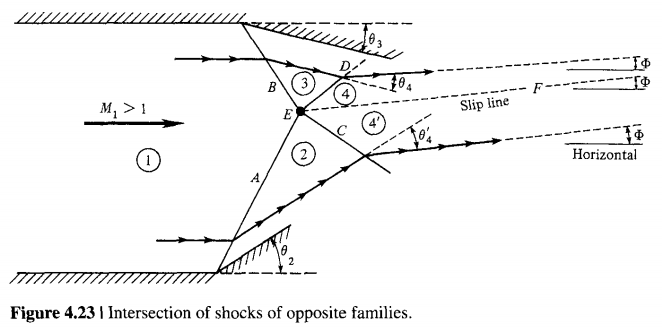

Figure 4.23 of "Modern Compressible Flow with Historical Perspective", Third Edition, John D. Anderson.

In [49]:
M1 = 3
p1 = 1 * atm
theta2 = 20
theta3 = -15

In [50]:
l1 = PressureDeflectionLocus(M=M1, label="1")
l2 = l1.new_locus_from_shockwave(theta2, label="2")
l3 = l1.new_locus_from_shockwave(theta3, label="3")

phi, p4_p1 = l2.intersection(l3)
theta4 = phi - l3.theta_origin
theta4p = phi - l2.theta_origin
print("Intersection between locus M2 and locus M3 happens at:")
print("Deflection Angle, Φ [deg]:", phi)
print("Pressure ratio to freestream:", p4_p1)
print()
print("From geometry:")
print("theta_4 [deg] =", theta4)
print("theta_4' [deg] =", theta4p)

Intersection between locus M2 and locus M3 happens at:
Deflection Angle, Φ [deg]: 4.795958931693682
Pressure ratio to freestream: 8.352551913417367

From geometry:
theta_4 [deg] = 19.795958931693683
theta_4' [deg] = -15.204041068306317


In [51]:
p4 = p4_p1 * p1
p4

<Quantity(8.35255191, 'standard_atmosphere')>

In [52]:
d = PressureDeflectionDiagram()
d.add_locus(l1)
d.add_locus(l2)
d.add_locus(l3)
d.add_path((l1, theta2), (l2, phi))
d.add_path((l1, theta3), (l3, phi))
d.add_state(
    phi, p4_p1, "4=4'",
    background_fill_color="white",
    background_fill_alpha=0.8)
d.move_legend_outside()
d.y_range = (0, 18)
d.show_figure()

## P 4.10

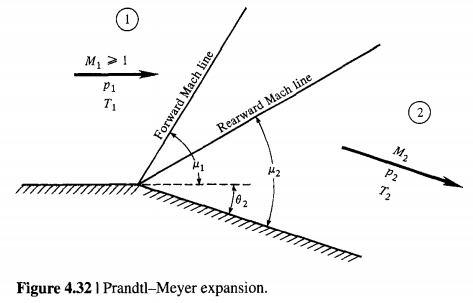

Figure 4.32 of "Modern Compressible Flow with Historical Perspective", Third Edition, John D. Anderson.

In [53]:
theta2 = 30
M1 = 2
p1 = 3 * atm
T1 = 400 * K

In [54]:
res1 = isentropic_solver("m", M1)
res1.show()

key     quantity            
----------------------------
m       M                        2.00000000
pr      P / P0                   0.12780453
dr      rho / rho0               0.23004815
tr      T / T0                   0.55555556
prs     P / P*                   0.24192491
drs     rho / rho*               0.36288737
trs     T / T*                   0.66666667
urs     U / U*                   1.63299316
ars     A / A*                   1.68750000
ma      Mach Angle              30.00000000
pm      Prandtl-Meyer           26.37976081


$$
\theta_{2} = \nu(M_{2}) - \nu(M_{1}) \quad \rightarrow \quad \nu(M_{2}) = \theta_{2} + \nu(M_{1})
$$

In [55]:
mu1 = res1["ma"]
nu1 = res1["pm"]
nu2 = theta2 + nu1
nu2

np.float64(56.37976081341645)

In [56]:
res2 = isentropic_solver("prandtl_meyer", nu2)
res2.show()

key     quantity            
----------------------------
m       M                        3.36827477
pr      P / P0                   0.01583151
dr      rho / rho0               0.05175406
tr      T / T0                   0.30589880
prs     P / P*                   0.02996792
drs     rho / rho*               0.08163898
trs     T / T*                   0.36707856
urs     U / U*                   2.04073693
ars     A / A*                   6.00226862
ma      Mach Angle              17.27077828
pm      Prandtl-Meyer           56.37976081


In [57]:
p1_p0 = res1["pr"]
T1_T0 = res1["tr"]
p2_p0 = res2["pr"]
T2_T0 = res2["tr"]

M2 = res2["m"]
mu2 = res2["ma"]
p2 = p2_p0 / p1_p0 * p1
T2 = T2_T0 / T1_T0 * T1

In [58]:
M2

np.float64(3.368274773334363)

In [59]:
p2

<Quantity(0.371618419, 'standard_atmosphere')>

In [60]:
T2

<Quantity(220.247136, 'kelvin')>

In [61]:
afml = mu1
arml = mu2 - theta2
print("Angle of forward Mach line, mu1 =", afml)
print("Angle of rearward Mach line, mu2 =", arml)

Angle of forward Mach line, mu1 = 30.000000000000004
Angle of rearward Mach line, mu2 = -12.729221721532138


## P 4.11

In [62]:
M1 = 3
p2_p1 = 0.4

In [63]:
res1 = isentropic_solver("m", M1)
res1.show()

key     quantity            
----------------------------
m       M                        3.00000000
pr      P / P0                   0.02722368
dr      rho / rho0               0.07622631
tr      T / T0                   0.35714286
prs     P / P*                   0.05153250
drs     rho / rho*               0.12024251
trs     T / T*                   0.42857143
urs     U / U*                   1.96396101
ars     A / A*                   4.23456790
ma      Mach Angle              19.47122063
pm      Prandtl-Meyer           49.75734674


In [64]:
mu1 = res1["ma"] * deg
nu1 = res1["pm"] * deg
p1_p01 = res1["pr"]


$$
\frac{p_{2}}{p_{1}} = \frac{p_{2}}{p_{02}} \frac{p_{01}}{p_{1}} = 0.4 \quad \implies \quad \frac{p_{2}}{p_{02}} = \frac{p_{1}}{p_{01}} \frac{p_{2}}{p_{1}}
$$

In [65]:
p2_p02 = p1_p01 * p2_p1
p2_p02

np.float64(0.010889473481545129)

In [66]:
res2 = isentropic_solver("pressure", p2_p02)
res2.show()

key     quantity            
----------------------------
m       M                        3.63176061
pr      P / P0                   0.01088947
dr      rho / rho0               0.03961522
tr      T / T0                   0.27488106
prs     P / P*                   0.02061300
drs     rho / rho*               0.06249067
trs     T / T*                   0.32985728
urs     U / U*                   2.08583643
ars     A / A*                   7.67192906
ma      Mach Angle              15.98278625
pm      Prandtl-Meyer           60.57522486


In [67]:
mu2 = res2["ma"] * deg
nu2 = res2["pm"] * deg

In [68]:
theta2 = nu2 - nu1
theta2

<Quantity(10.8178781, 'degree')>

In [69]:
afml = mu1
arml = mu2 - theta2
print("Angle of forward Mach line:", afml)
print("Angle of rearward Mach line:", arml)

Angle of forward Mach line: 19.47122063449069 deg
Angle of rearward Mach line: 5.164908132843042 deg


## P 4.12

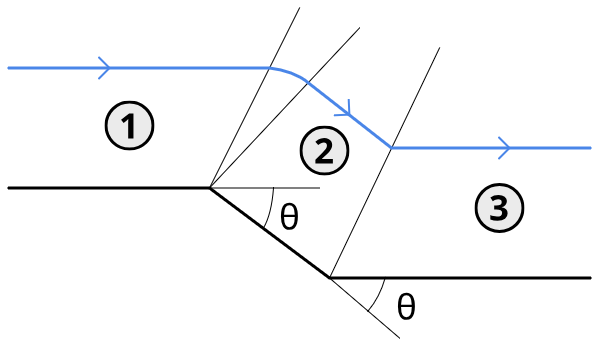

In [70]:
M1 = 4
p1 = 1 * atm
theta = 15 * deg

In [71]:
res1 = isentropic_solver("m", M1)
res1.show()

key     quantity            
----------------------------
m       M                        4.00000000
pr      P / P0                   0.00658609
dr      rho / rho0               0.02766157
tr      T / T0                   0.23809524
prs     P / P*                   0.01246700
drs     rho / rho*               0.04363449
trs     T / T*                   0.28571429
urs     U / U*                   2.13808994
ars     A / A*                  10.71875000
ma      Mach Angle              14.47751219
pm      Prandtl-Meyer           65.78481980


In [72]:
mu1 = res1["ma"] * deg
nu1 = res1["pm"] * deg
p1_p01 = res1["pr"]

$$
\theta_{2} = \nu(M_{2}) - \nu(M_{1}) \quad \rightarrow \quad \nu(M_{2}) = \theta_{2} + \nu(M_{1})
$$

In [73]:
nu2 = theta + nu1
nu2

<Quantity(80.7848198, 'degree')>

In [74]:
res2 = isentropic_solver("prandtl_meyer", nu2)
res2.show()

key     quantity            
----------------------------
m       M                        5.44294514
pr      P / P0                   0.00114420
dr      rho / rho0               0.00792374
tr      T / T0                   0.14440161
prs     P / P*                   0.00216589
drs     rho / rho*               0.01249923
trs     T / T*                   0.17328194
urs     U / U*                   2.26574277
ars     A / A*                  35.31068684
ma      Mach Angle [deg]        10.58675162
pm      Prandtl-Meyer [deg]     80.78481980


In [75]:
M2 = res2["m"]
p2_p02 = res2["pr"]
mu2 = res2["ma"]

But $p_{02} = p_{01}$:

In [76]:
p2 = p2_p02 / p1_p01 * p1
p2

<Quantity(0.173729944, 'standard_atmosphere')>

In [77]:
M2

np.float64(5.4429451442492365)

In [78]:
res3 = shockwave_solver("mu", M2, "theta", theta)
res3.show()

key     quantity     
---------------------
mu      Mu                5.44294514
mnu     Mnu               2.17006096
md      Md                3.73024023
mnd     Mnd               0.55113671
beta    beta [deg]       23.49646058
theta   theta [deg]      15.00000000
pr      pd/pu             5.32735865
dr      rhod/rhou         2.91013580
tr      Td/Tu             1.83062201
tpr     p0d/p0u           0.64182489


In [79]:
M3 = res3["md"]
p3_p2 = res3["pr"]
p3 = p3_p2 * p2
p3

<Quantity(0.925521718, 'standard_atmosphere')>

In [80]:
M3

np.float64(3.730240229949434)

## P 4.14

In [81]:
theta = 20 * deg
M1 = 3
p1 = 2116 * lb / ft**2

Oblique shockwave followed by a normal shockwave in front of the Pitot tube.

In [82]:
res1 = isentropic_solver("m", M1)
res1.show()

key     quantity            
----------------------------
m       M                        3.00000000
pr      P / P0                   0.02722368
dr      rho / rho0               0.07622631
tr      T / T0                   0.35714286
prs     P / P*                   0.05153250
drs     rho / rho*               0.12024251
trs     T / T*                   0.42857143
urs     U / U*                   1.96396101
ars     A / A*                   4.23456790
ma      Mach Angle              19.47122063
pm      Prandtl-Meyer           49.75734674


In [83]:
p01 = (1 / res1["pr"]) * p1
p01

<Quantity(77726.4393, 'pound / foot ** 2')>

In [84]:
shock1 = oblique_shockwave_solver("mu", M1, "theta", theta)
shock1.show()

key     quantity     
---------------------
mu      Mu                3.00000000
mnu     Mnu               1.83721625
md      Md                1.99413167
mnd     Mnd               0.60839147
beta    beta [deg]       37.76363415
theta   theta [deg]      20.00000000
pr      pd/pu             3.77125746
dr      rhod/rhou         2.41806593
tr      Td/Tu             1.55961730
tpr     p0d/p0u           0.79601825


In [85]:
p2_p1 = shock1["pr"]
p02_p01 = shock1["tpr"]
M2 = shock1["md"]

In [86]:
shock2 = normal_shockwave_solver("mu", M2)
shock2.show()

key     quantity     
---------------------
mu      Mu                1.99413167
md      Md                0.57835792
pr      pd/pu             4.47265462
dr      rhod/rhou         2.65796293
tr      Td/Tu             1.68273777
tpr     p0d/p0u           0.72361541


In [87]:
p3_p2 = shock2["pr"]
p3 = p3_p2 * p2_p1 * p1
p3

<Quantity(35691.6979, 'pound / foot ** 2')>

In [88]:
p03_p02 = shock2["tpr"]
p03 = p03_p02 * p02_p01 * p01
p03

<Quantity(44771.2902, 'pound / foot ** 2')>

## P 4.16

This is a modified version of Figure 4.35 of "Modern Compressible Flow with Historical Perspective", Third Edition, John D. Anderson.

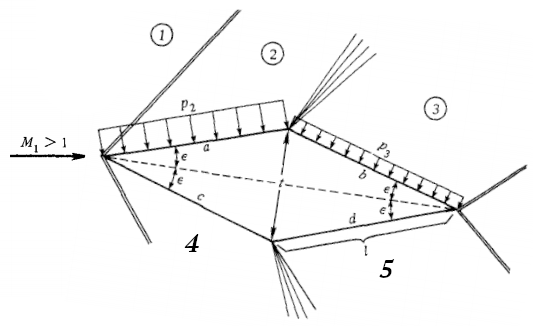

In [89]:
epsilon = 15 * deg
alpha = 5 * deg
M1 = 2
p1 = 2116 * lb / ft**2
t = 0.5 * ft
w = 1 * ft

### (1)

In [90]:
res1 = isentropic_solver("m", M1)
res1.show()

key     quantity            
----------------------------
m       M                        2.00000000
pr      P / P0                   0.12780453
dr      rho / rho0               0.23004815
tr      T / T0                   0.55555556
prs     P / P*                   0.24192491
drs     rho / rho*               0.36288737
trs     T / T*                   0.66666667
urs     U / U*                   1.63299316
ars     A / A*                   1.68750000
ma      Mach Angle              30.00000000
pm      Prandtl-Meyer           26.37976081


In [91]:
p01 = (1 / res1["pr"]) * p1
p01

<Quantity(16556.5342, 'pound / foot ** 2')>

### (2)

In [92]:
theta1 = epsilon - alpha
shock1 = shockwave_solver("mu", M1, "theta", theta1)
shock1.show()

key     quantity     
---------------------
mu      Mu                2.00000000
mnu     Mnu               1.26713804
md      Md                1.64052223
mnd     Mnd               0.80319064
beta    beta [deg]       39.31393184
theta   theta [deg]      10.00000000
pr      pd/pu             1.70657860
dr      rhod/rhou         1.45842561
tr      Td/Tu             1.17015128
tpr     p0d/p0u           0.98464402


In [93]:
p2_p1 = shock1["pr"]
p2 = p2_p1 * p1
p2

<Quantity(3611.12033, 'pound / foot ** 2')>

In [94]:
M2 = shock1["md"]
M2

np.float64(1.6405222290010815)

In [95]:
p02 = shock1["tpr"] * p01
p02

<Quantity(16302.2925, 'pound / foot ** 2')>

### (4)

In [96]:
theta4 = epsilon + alpha
shock2 = shockwave_solver("mu", M1, "theta", theta4)
shock2.show()

key     quantity     
---------------------
mu      Mu                2.00000000
mnu     Mnu               1.60611226
md      Md                1.21021840
mnd     Mnd               0.66660640
beta    beta [deg]       53.42294053
theta   theta [deg]      20.00000000
pr      pd/pu             2.84286271
dr      rhod/rhou         2.04200572
tr      Td/Tu             1.39219135
tpr     p0d/p0u           0.89291399


In [97]:
M4 = shock2["md"]
M4

np.float64(1.2102184008268027)

In [98]:
p4_p1 = shock2["pr"]
p4 = p4_p1 * p1
p4

<Quantity(6015.49748, 'pound / foot ** 2')>

In [99]:
p04 = shock2["tpr"] * p01
p04

<Quantity(14783.561, 'pound / foot ** 2')>

### (3)

In [100]:
flow2 = isentropic_solver("m", M2)
flow2.show()

key     quantity            
----------------------------
m       M                        1.64052223
pr      P / P0                   0.22150997
dr      rho / rho0               0.34074051
tr      T / T0                   0.65008405
prs     P / P*                   0.41930268
drs     rho / rho*               0.53749804
trs     T / T*                   0.78010086
urs     U / U*                   1.44896367
ars     A / A*                   1.28400175
ma      Mach Angle              37.55783897
pm      Prandtl-Meyer           16.05812747


In [101]:
theta = 2 * epsilon
nu2 = flow2["pm"] * deg
nu3 = theta  + nu2
nu3

<Quantity(46.0581275, 'degree')>

In [102]:
flow3 = isentropic_solver("prandtl_meyer", nu3)
flow3.show()

key     quantity            
----------------------------
m       M                        2.81502588
pr      P / P0                   0.03601323
dr      rho / rho0               0.09308967
tr      T / T0                   0.38686603
prs     P / P*                   0.06817050
drs     rho / rho*               0.14684346
trs     T / T*                   0.46423924
urs     U / U*                   1.91802081
ars     A / A*                   3.55052092
ma      Mach Angle [deg]        20.80794089
pm      Prandtl-Meyer [deg]     46.05812747


In [103]:
M3 = flow3["m"]
M3

np.float64(2.8150258807892357)

Note that $p_{02} = p_{03}$.

In [104]:
p3 = flow3["pr"] * p02
p3

<Quantity(587.098232, 'pound / foot ** 2')>

### (5)

In [105]:
flow4 = isentropic_solver("m", M4)
flow4.show()

key     quantity            
----------------------------
m       M                        1.21021840
pr      P / P0                   0.40690450
dr      rho / rho0               0.52609729
tr      T / T0                   0.77343964
prs     P / P*                   0.77024139
drs     rho / rho*               0.82988742
trs     T / T*                   0.92812757
urs     U / U*                   1.16591688
ars     A / A*                   1.03350654
ma      Mach Angle              55.72022231
pm      Prandtl-Meyer            3.81141102


In [106]:
theta = 2 * epsilon
nu4 = flow4["pm"] * deg
nu5 = theta + nu4
nu5

<Quantity(33.811411, 'degree')>

In [107]:
flow5 = isentropic_solver("prandtl_meyer", nu5)
flow5.show()

key     quantity            
----------------------------
m       M                        2.28125903
pr      P / P0                   0.08235257
dr      rho / rho0               0.16806748
tr      T / T0                   0.48999707
prs     P / P*                   0.15588759
drs     rho / rho*               0.26511653
trs     T / T*                   0.58799648
urs     U / U*                   1.74929060
ars     A / A*                   2.15626049
ma      Mach Angle [deg]        25.99893434
pm      Prandtl-Meyer [deg]     33.81141102


In [108]:
M5 = flow5["m"]
M5

np.float64(2.2812590270489608)

Note that $p_{04} = p_{05}$:

In [109]:
p5 = flow5["pr"] * p04
p5

<Quantity(1217.46429, 'pound / foot ** 2')>

### drag and lift

In [110]:
# length of oblique faces
l = (t / 2) / np.sin(epsilon)
l

<Quantity(0.965925826, 'foot')>

In [111]:
area = l * w
area

<Quantity(0.965925826, 'foot ** 2')>

(Normal) forces exerted by pressure to the surfaces:

In [112]:
F2 = p2 * area
F2

<Quantity(3488.07438, 'pound')>

In [113]:
F3 = p3 * area
F3

<Quantity(567.093345, 'pound')>

In [114]:
F4 = p4 * area
F4

<Quantity(5810.52438, 'pound')>

In [115]:
F5 = p5 * area
F5

<Quantity(1175.9802, 'pound')>

Drag:

In [116]:
D = F2 * np.sin(epsilon - alpha) + F4 * np.sin(epsilon + alpha) - F3 * np.sin(epsilon + alpha) - F5 * np.sin(epsilon - alpha)
D

<Quantity(2194.84997, 'pound')>

Lift:

In [117]:
L = -F2 * np.cos(epsilon - alpha) + F4 * np.cos(epsilon + alpha) - F3 * np.cos(epsilon + alpha) + F5 * np.cos(epsilon - alpha)
L

<Quantity(2650.24517, 'pound')>

## P 4.17

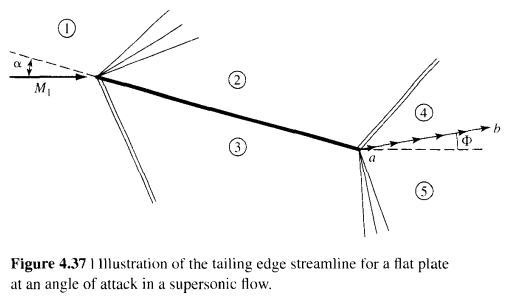

Figure 4.37 of "Modern Compressible Flow with Historical Perspective", Third Edition, John D. Anderson.

In [118]:
c = 1 * m
M1 = 3
p1 = 1 * atm
T1 = 270 * K
w = 1 * m

In [119]:
alpha_min = 0 * deg
alpha_max = 30 * deg
N = 100
alpha = np.linspace(alpha_min, alpha_max, N)

In [120]:
flow1 = isentropic_solver("m", M1)
flow1.show()

key     quantity            
----------------------------
m       M                        3.00000000
pr      P / P0                   0.02722368
dr      rho / rho0               0.07622631
tr      T / T0                   0.35714286
prs     P / P*                   0.05153250
drs     rho / rho*               0.12024251
trs     T / T*                   0.42857143
urs     U / U*                   1.96396101
ars     A / A*                   4.23456790
ma      Mach Angle              19.47122063
pm      Prandtl-Meyer           49.75734674


In [121]:
p0 = (1 / flow1["pr"]) * p1
p0

<Quantity(36.7327218, 'standard_atmosphere')>

In [122]:
T0 = (1 / flow1["tr"]) * T1
T0

<Quantity(756.0, 'kelvin')>

In [123]:
from collections import defaultdict

results = defaultdict(list)

def compute(alpha):
    nu1 = flow1["pm"] * deg
    nu2 = alpha + nu1
    flow2 = isentropic_solver("prandtl_meyer", nu2)
    p2 = flow2["pr"] * p0
    T2 = flow2["tr"] * T0
    shock = shockwave_solver("mu", M1, "theta", alpha)
    p3 = shock["pr"] * p1
    T3 = shock["tr"] * T1
    Lp = ((p3 - p2) * c * w * np.cos(alpha.to("radian"))).to("N")
    Dp = ((p3 - p2) * c * w * np.sin(alpha.to("radian"))).to("N")

    results["p2"].append(p2)
    results["T2"].append(T2)
    results["p3"].append(p3)
    results["T3"].append(T3)
    results["Lp"].append(Lp)
    results["Dp"].append(Dp)
    results["L_D"].append(Lp / Dp)

for a in alpha:
    compute(a)

# post-processing: create numpy arrays
for k in results:
    units = 1 if results[k][0].unitless else results[k][0].units
    results[k] = np.array([r.magnitude for r in results[k]]) * units

/home/davide/Documents/Development/envs/pygas/lib/python3.12/site-packages/pint/facets/plain/quantity.py:1029: RuntimeWarning: divide by zero encountered in scalar divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


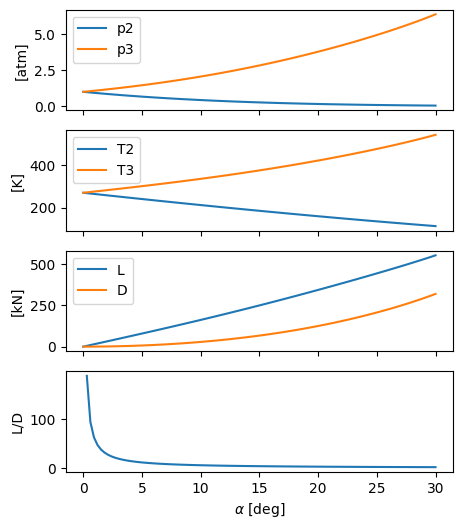

In [124]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(5, 6))
ax[0].plot(alpha.magnitude, results["p2"].magnitude, label="p2")
ax[0].plot(alpha.magnitude, results["p3"].magnitude, label="p3")
ax[0].legend()
ax[0].set_ylabel("[atm]")
ax[1].plot(alpha.magnitude, results["T2"].magnitude, label="T2")
ax[1].plot(alpha.magnitude, results["T3"].magnitude, label="T3")
ax[1].legend()
ax[1].set_ylabel("[K]")
ax[2].plot(alpha.magnitude, results["Lp"].magnitude / 1000, label="L")
ax[2].plot(alpha.magnitude, results["Dp"].magnitude / 1000, label="D")
ax[2].legend()
ax[2].set_ylabel("[kN]")
ax[3].plot(alpha.magnitude, results["L_D"])
ax[3].set_xlabel(r"$\alpha$ [deg]")
ax[3].set_ylabel("L/D")
plt.show()

## P 4.18

In [125]:
M1 = 2
alpha = 2 * deg
c = 1 * m
w = 1 * ft
p1 = 1 * atm

In [126]:
# skin drag friction: adapted from example 1.8
import sympy as sp
a, b, epsilon = sp.symbols("a, b, epsilon")
tw = (13 * epsilon**(sp.Rational(2, 10)))    # lb/ft**2
tmp = float(tw.integrate((epsilon, a, b)).subs({a:0, b: c.to("ft").magnitude}))
# NOTE: the shear stress acts on both sides of the flat plate
Df = (tmp * 2 * np.cos(alpha.to("radian"))) * lbf
Df

<Quantity(90.0968289, 'force_pound')>

In [127]:
flow1 = isentropic_solver("m", M1)
flow1.show()

key     quantity            
----------------------------
m       M                        2.00000000
pr      P / P0                   0.12780453
dr      rho / rho0               0.23004815
tr      T / T0                   0.55555556
prs     P / P*                   0.24192491
drs     rho / rho*               0.36288737
trs     T / T*                   0.66666667
urs     U / U*                   1.63299316
ars     A / A*                   1.68750000
ma      Mach Angle              30.00000000
pm      Prandtl-Meyer           26.37976081


In [128]:
nu1 = flow1["pm"] * deg
p1_p01 = flow1["pr"]

In [129]:
nu2 = alpha + nu1
flow2 = isentropic_solver("prandtl_meyer", nu2)
flow2.show()

key     quantity            
----------------------------
m       M                        2.07331377
pr      P / P0                   0.11400624
dr      rho / rho0               0.21202037
tr      T / T0                   0.53771362
prs     P / P*                   0.21580574
drs     rho / rho*               0.33444962
trs     T / T*                   0.64525634
urs     U / U*                   1.66544837
ars     A / A*                   1.79530450
ma      Mach Angle [deg]        28.83701273
pm      Prandtl-Meyer [deg]     28.37976081


In [130]:
M2 = flow2["m"]
M2

np.float64(2.0733137748327835)

In [131]:
p2_p02 = flow2["pr"]
p2 = p2_p02 * (1 / p1_p01) * p1
p2

<Quantity(0.892036031, 'standard_atmosphere')>

In [132]:
shock = shockwave_solver("mu", M1, "theta", alpha)
shock.show()

key     quantity     
---------------------
mu      Mu                2.00000000
mnu     Mnu               1.04934767
md      Md                1.92805111
mnd     Mnd               0.95369922
beta    beta [deg]       31.64628844
theta   theta [deg]       2.00000000
pr      pd/pu             1.11798561
dr      rhod/rhou         1.08287851
tr      Td/Tu             1.03242016
tpr     p0d/p0u           0.99985849


In [133]:
p3_p1 = shock["pr"]
p3 = p3_p1 * p1
p3

<Quantity(1.11798561, 'standard_atmosphere')>

In [134]:
L = (p3 - p2) * c * w * np.cos(alpha)
L = L.to("lbf")
L

<Quantity(1567.80504, 'force_pound')>

In [135]:
D = (p3 - p2) * c * w * np.sin(alpha)
D = D.to("lbf")
D

<Quantity(54.7489585, 'force_pound')>

In [136]:
percentage = Df / (Df + D)
percentage

<Quantity(0.62201898, 'dimensionless')>

In comparison to example 1.8, at lower angle of attacks the skin drag becomes comparable to the wave drag.

## P 4.19

This is a modified version of Figure 4.40 of "Modern Compressible Flow with Historical Perspective", Third Edition, John D. Anderson.

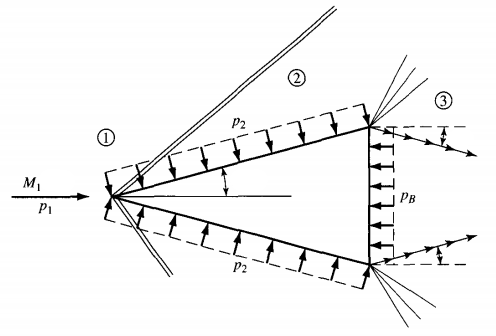

In [137]:
M1 = 4
theta = 20 * deg

In [138]:
# c: chord length of the wedge
# p1 : free stream pressure
import sympy as sp
c, p1 = sp.symbols("c, p1")
# l: length of the oblique side
l = c / sp.cos(theta.to("radian").magnitude)
# h: length of the vertical side
h = (2 * l * sp.sin(theta.to("radian").magnitude)).trigsimp()

$$
c_{d} = \frac{D'}{q_{1} c}
$$

where:

* $D'$: drag per unit span.
* $q_{1} = \frac{\gamma}{2} p_{1} M_{1}^{2}$: dynamic pressure.
* $c$: chord length of the wedge

In [139]:
shock = shockwave_solver("mu", M1, "theta", theta)
shock.show()

key     quantity     
---------------------
mu      Mu                4.00000000
mnu     Mnu               2.14707226
md      Md                2.56861689
mnd     Mnd               0.55437017
beta    beta [deg]       32.46389685
theta   theta [deg]      20.00000000
pr      pd/pu             5.21157250
dr      rhod/rhou         2.87822560
tr      Td/Tu             1.81068937
tpr     p0d/p0u           0.65240150


In [140]:
p2_p1 = shock["pr"]
Dp = l * p2_p1 * p1 * sp.sin(theta) * 2 - h * p1
Dp = Dp.n()
Dp

3.06577406052391*c*p1

In [141]:
q1 = (gamma / 2) * p1 * M1**2
q1

11.2*p1

In [142]:
cd = Dp / (q1 * c)
cd

0.273729826832492

## P 4.20

In [143]:
M1 = 3
gamma1 = 1.4
gamma2 = 1.2
theta = 20 * deg

In [144]:
shock1 = shockwave_solver("mu", M1, "theta", theta, gamma1)
shock1.show()

key     quantity     
---------------------
mu      Mu                3.00000000
mnu     Mnu               1.83721625
md      Md                1.99413167
mnd     Mnd               0.60839147
beta    beta [deg]       37.76363415
theta   theta [deg]      20.00000000
pr      pd/pu             3.77125746
dr      rhod/rhou         2.41806593
tr      Td/Tu             1.55961730
tpr     p0d/p0u           0.79601825


In [145]:
beta1 = shock1["beta"]
beta1

<Quantity(37.7636341, 'degree')>

In [146]:
shock2 = shockwave_solver("mu", M1, "theta", theta, gamma2)
shock2.show()

key     quantity     
---------------------
mu      Mu                3.00000000
mnu     Mnu               1.74476259
md      Md                2.25845491
mnd     Mnd               0.60591105
beta    beta [deg]       35.56227873
theta   theta [deg]      20.00000000
pr      pd/pu             3.23003255
dr      rhod/rhou         2.56713102
tr      Td/Tu             1.25822660
tpr     p0d/p0u           0.81405494


In [147]:
beta2 = shock2["beta"]
beta2

<Quantity(35.5622787, 'degree')>

Wave angle is reduced when considering chemically reacting gases.

## P 4.21

In [148]:
p2_p1_a = shock1["pr"]
p2_p1_a

np.float64(3.771257463082658)

In [149]:
p2_p1_b = shock2["pr"]
p2_p1_b

np.float64(3.2300325483469434)

Chemically reacting gases reduce the pressure change across the shockwave.